## Observations and Insights 

In [66]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
from scipy.stats import linregress
from matplotlib.pyplot import figure
from sklearn import datasets


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
merged_data_frame = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")

# Display the data table for preview
merged_data_frame.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [67]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [68]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [69]:
# Checking the number of mice.
mice_value = merged_data_frame["Mouse ID"].value_counts()
number_of_mice=len(mice_value)
number_of_mice

249

In [70]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_by_id = merged_data_frame.loc[merged_data_frame.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()


In [71]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mouse_id=pd.DataFrame(duplicate_mice_by_id)
all_duplicate_mouse_id


,0
0,g989


In [72]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_frame = merged_data_frame[merged_data_frame['Mouse ID'].isin(duplicate_mice_by_id)==False]

In [73]:
# Checking the number of mice in the clean DataFrame.
#
clean_mice_in_df=clean_data_frame["Mouse ID"].value_counts()
clean_number_of_mice=len(clean_mice_in_df)

# Display "clean_number_of_mice"
#
clean_number_of_mice


248

## Summary Statistics

In [74]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
#
mean = merged_data_frame.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = merged_data_frame.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = merged_data_frame.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv = merged_data_frame.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = merged_data_frame.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, 
                          "SEM": sem})
summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [75]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
#
single_group_by = clean_data_frame.groupby('Drug Regimen')
summary_stats_table_single = single_group_by.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_stats_table_single


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

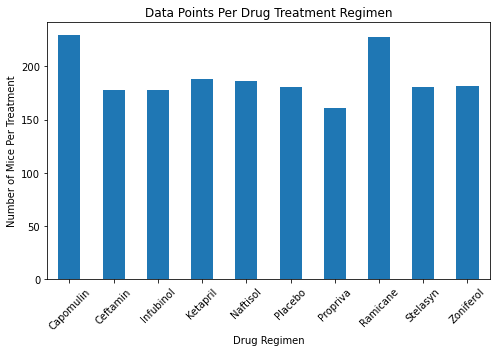

In [76]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
#
number_of_mice_per_treatment = merged_data_frame.groupby('Drug Regimen').count()['Tumor Volume (mm3)']
mice_panda_df = pd.DataFrame(number_of_mice_per_treatment)

my_plot_pandas = mice_panda_df.plot.bar(figsize=(7,5),legend=False,rot=45)
my_plot_pandas
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Per Treatment")
plt.title("Data Points Per Drug Treatment Regimen")

plt.savefig("../Images/panda_mice_per_treatment.png", bbox_inches = "tight")
plt.tight_layout()
plt.show()


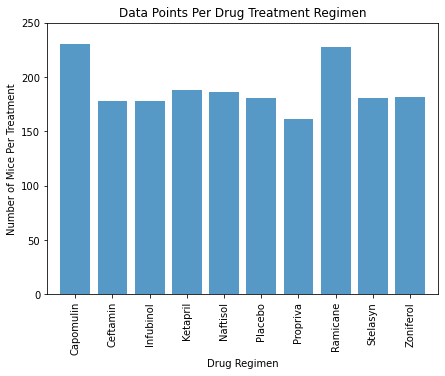

In [77]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

#  Create an array that contains the number of mice each drug regimen has

x_axis = np.arange(len(number_of_mice_per_treatment))

tick_locations = [x for x in x_axis]

# Plot using pyplot
#
plt.figure(figsize=(7,5))

reset_df_index = mice_panda_df.reset_index()

plt.bar(x_axis, mice_panda_df['Tumor Volume (mm3)'], alpha=0.75, align="center")
plt.xticks(tick_locations, reset_df_index['Drug Regimen'],rotation="vertical")

plt.xlim(-0.75, len(number_of_mice_per_treatment)-.25)
plt.ylim(0, 250)

plt.title("Data Points Per Drug Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Per Treatment")

plt.savefig("../Images/mat_mice_per_treat.png", bbox_inches = "tight")


In [78]:
#  Group by gender and get the number to plot
groupby_gender = merged_data_frame.groupby(["Mouse ID","Sex"])
groupby_gender
gender_df = pd.DataFrame(groupby_gender.size())

# Create the dataframe with total count of Female and Male mice
mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

# create and format the percentage of female vs male
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

# format the "Percentage of Sex" column
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]

# gender_df
mouse_gender



,Total Count,Percentage of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


<ipython-input-79-af61261bdf8f>:8: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  plt.axis("equal",fontsize = 14)


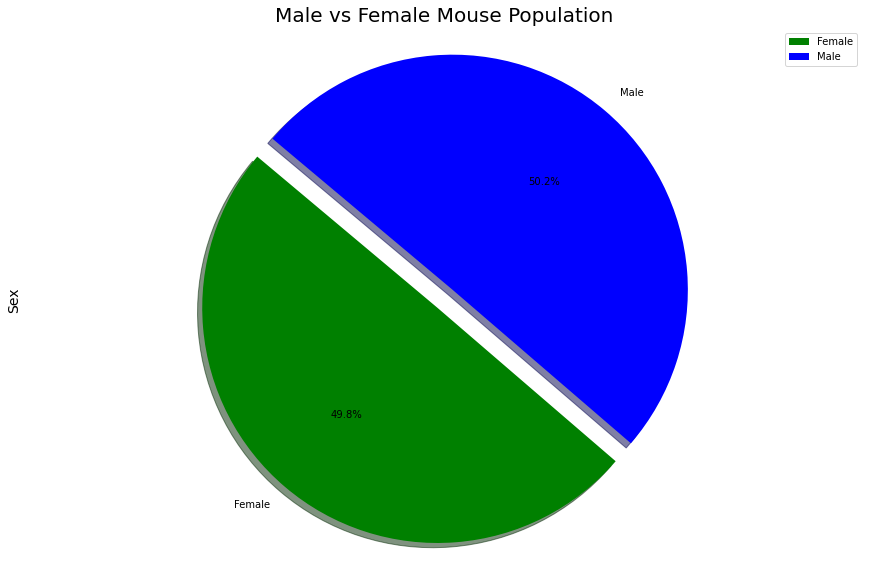

In [79]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors = ['green', 'blue']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Total Count',figsize=(15,10), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")

plt.title('Male vs Female Mouse Population',fontsize = 20)
plt.ylabel('Sex',fontsize = 14)
plt.axis("equal",fontsize = 14)

plt.savefig("../Images/pi_pandas.png", bbox_inches = "tight")
plt.show()


<ipython-input-80-cca980d897ae>:20: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  plt.axis("equal",fontsize = 14)


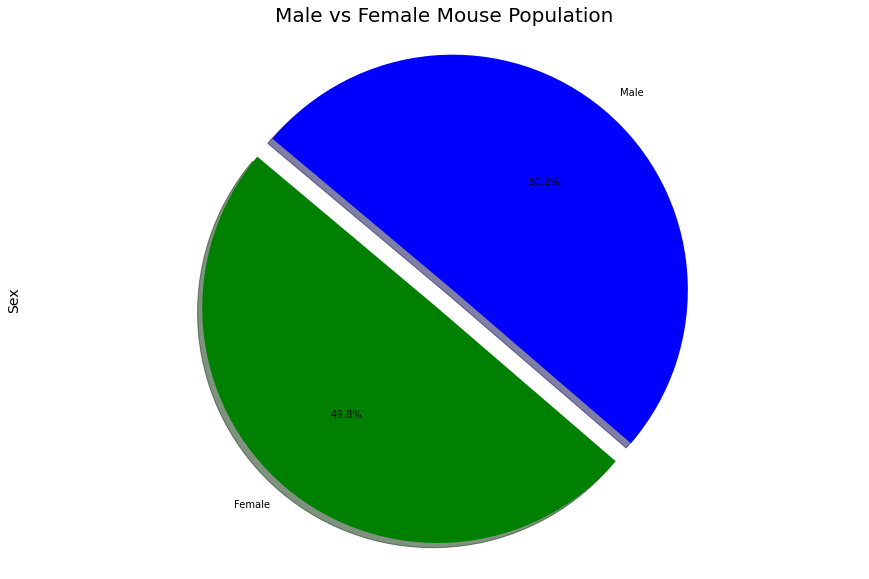

In [80]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Create Labels for the sections of the pie
labels = ["Female","Male"]

#List the values of each section of the pie chart
sizes = [49.799197,50.200803]

#Set colors for each section of the pie
colors = ['green', 'blue']

#Determoine which section of the circle to detach
explode = (0.1, 0)

#Create the pie chart based upon the values 
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.pie(sizes, explode=explode,labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140,)
plt.title('Male vs Female Mouse Population',fontsize = 20)
plt.ylabel('Sex',fontsize = 14)
#Set equal axis
plt.axis("equal",fontsize = 14)

plt.savefig("../Images/pi_plot.png", bbox_inches = "tight")
plt.show()


## Quartiles, Outliers and Boxplots

In [81]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_df = merged_data_frame.loc[merged_data_frame["Drug Regimen"] == "Capomulin",:]
ramicane_df = merged_data_frame.loc[merged_data_frame["Drug Regimen"] == "Ramicane", :]
infubinol_df = merged_data_frame.loc[merged_data_frame["Drug Regimen"] == "Infubinol", :]
ceftamin_df = merged_data_frame.loc[merged_data_frame["Drug Regimen"] == "Ceftamin", :]
capomulin_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [82]:
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#
# This is based on: "Capomulin" Drug Regimen
#
capomulin_last_tp = capomulin_df.groupby('Mouse ID').max()['Timepoint']
capomulin_last_df_vol = pd.DataFrame(capomulin_last_tp)
capomulin_last_df_vol_merged = pd.merge(capomulin_last_df_vol, merged_data_frame, on=("Mouse ID","Timepoint"),how="left")
capomulin_last_df_vol_merged.head(5)


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [83]:
# Quantitatively determine capomulin outliers:
# Capomulin quartiles and IQR
# Determine outliers using upper and lower bounds
capomulin_tumors = capomulin_last_df_vol_merged["Tumor Volume (mm3)"]

quartiles = capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
IQR = upperq-lowerq


print(f"The lower quartile of Capomulin Tumors: {lowerq}")
print(f"The upper quartile of Capomulin Tumors: {upperq}")
print(f"The interquartile range of Capomulin Tumors: {IQR}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*IQR)
upper_bound = upperq + (1.5*IQR)

print(f"Values below {lower_bound}, This could be an Outliers!")
print(f"Values above {upper_bound}, This could be an Outliers!")


The lower quartile of Capomulin Tumors: 32.37735684
The upper quartile of Capomulin Tumors: 40.1592203
The interquartile range of Capomulin Tumors: 7.781863460000004
The median of Capomulin tumors: 38.125164399999996 
Values below 20.70456164999999, This could be an Outliers!
Values above 51.83201549, This could be an Outliers!


In [84]:
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#
# This is based on: "Ramicane" Drug Regimen
#
ramicane_last_tp = ramicane_df.groupby('Mouse ID').max()['Timepoint']
ramicane_last_df_vol = pd.DataFrame(ramicane_last_tp)
ramicane_last_df_vol_merged = pd.merge(ramicane_last_df_vol, merged_data_frame, on=("Mouse ID","Timepoint"),how="left")
ramicane_last_df_vol_merged.head(10)


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2
5,c758,45,Ramicane,Male,9,17,33.397653,1
6,d251,45,Ramicane,Female,8,19,37.311236,2
7,e662,45,Ramicane,Male,8,24,40.659006,2
8,g791,45,Ramicane,Male,11,16,29.128472,1
9,i177,45,Ramicane,Male,10,18,33.562402,3


In [85]:
# Quantitatively determine Ramicane outliers:
# Ramicane quartiles and IQR
# Determine outliers using upper and lower bounds
ramicane_tumors = ramicane_last_df_vol_merged["Tumor Volume (mm3)"]

quartiles = ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
IQR = upperq-lowerq


print(f"The lower quartile of Ramicane Tumors: {lowerq}")
print(f"The upper quartile of Ramicane Tumors: {upperq}")
print(f"The interquartile range of Ramicane Tumors: {IQR}")
print(f"The median of Ramicane tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*IQR)
upper_bound = upperq + (1.5*IQR)

print(f"Values below {lower_bound}, This could be an Outliers!")
print(f"Values above {upper_bound}, This could be an Outliers!")



The lower quartile of Ramicane Tumors: 31.56046955
The upper quartile of Ramicane Tumors: 40.65900627
The interquartile range of Ramicane Tumors: 9.098536719999998
The median of Ramicane tumors: 36.56165229 
Values below 17.912664470000003, This could be an Outliers!
Values above 54.30681135, This could be an Outliers!


In [86]:
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#
# This is based on: "Infubinol" Drug Regimen
#
infubinol_last_tp = infubinol_df.groupby('Mouse ID').max()['Timepoint']
infubinol_last_df_vol = pd.DataFrame(infubinol_last_tp)
infubinol_last_df_vol_merged = pd.merge(infubinol_last_df_vol, merged_data_frame, on=("Mouse ID","Timepoint"),how="left")
infubinol_last_df_vol_merged.head(10)


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2
5,c326,5,Infubinol,Female,18,25,36.321346,0
6,c895,30,Infubinol,Female,7,29,60.969711,2
7,e476,45,Infubinol,Male,23,26,62.435404,1
8,f345,45,Infubinol,Male,23,26,60.918767,1
9,i386,40,Infubinol,Female,23,29,67.289621,4


In [87]:
# Quantitatively determine Infubinol outliers:
# Infubinol quartiles and IQR
# Determine outliers using upper and lower bounds
#
infubinol_tumors = infubinol_last_df_vol_merged["Tumor Volume (mm3)"]

quartiles = infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
IQR = upperq-lowerq


print(f"The lower quartile of Infubinol Tumors: {lowerq}")
print(f"The upper quartile of Infubinol Tumors: {upperq}")
print(f"The interquartile range of Infubinol Tumors: {IQR}")
print(f"The median of Infubinol tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*IQR)
upper_bound = upperq + (1.5*IQR)

print(f"Values below {lower_bound}, This could be an Outliers!")
print(f"Values above {upper_bound}, This could be an Outliers!")



The lower quartile of Infubinol Tumors: 54.04860769
The upper quartile of Infubinol Tumors: 65.52574285
The interquartile range of Infubinol Tumors: 11.477135160000003
The median of Infubinol tumors: 60.16518046 
Values below 36.83290494999999, This could be an Outliers!
Values above 82.74144559000001, This could be an Outliers!


In [88]:
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#
# This is based on: "Ceftamin" Drug Regimen
#
ceftamin_last_tp = ceftamin_df.groupby('Mouse ID').max()['Timepoint']
ceftamin_last_df_vol = pd.DataFrame(ceftamin_last_tp)
ceftamin_last_df_vol_merged = pd.merge(ceftamin_last_df_vol, merged_data_frame, on=("Mouse ID","Timepoint"),how="left")
ceftamin_last_df_vol_merged.head(10)


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2
5,h531,5,Ceftamin,Male,5,27,47.784682,0
6,j296,45,Ceftamin,Female,24,30,61.849023,3
7,k210,45,Ceftamin,Male,15,28,68.923185,3
8,l471,45,Ceftamin,Female,7,28,67.748662,1
9,l490,30,Ceftamin,Male,24,26,57.918381,3


In [89]:
# Quantitatively determine Ceftamin outliers:
# Ramicane quartiles and IQR
# Determine outliers using upper and lower bounds
ceftamin_tumors = ceftamin_last_df_vol_merged["Tumor Volume (mm3)"]

quartiles = ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
IQR = upperq-lowerq

print(f"The lower quartile of Ceftamin Tumors: {lowerq}")
print(f"The upper quartile of Ceftamin Tumors: {upperq}")
print(f"The interquartile range of Ceftamin Tumors: {IQR}")
print(f"The median of Ceftamin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*IQR)
upper_bound = upperq + (1.5*IQR)

print(f"Values below {lower_bound}, This could be an Outliers!")
print(f"Values above {upper_bound}, This could be an Outliers!")


The lower quartile of Ceftamin Tumors: 48.72207785
The upper quartile of Ceftamin Tumors: 64.29983003
The interquartile range of Ceftamin Tumors: 15.577752179999997
The median of Ceftamin tumors: 59.85195552 
Values below 25.355449580000002, This could be an Outliers!
Values above 87.66645829999999, This could be an Outliers!


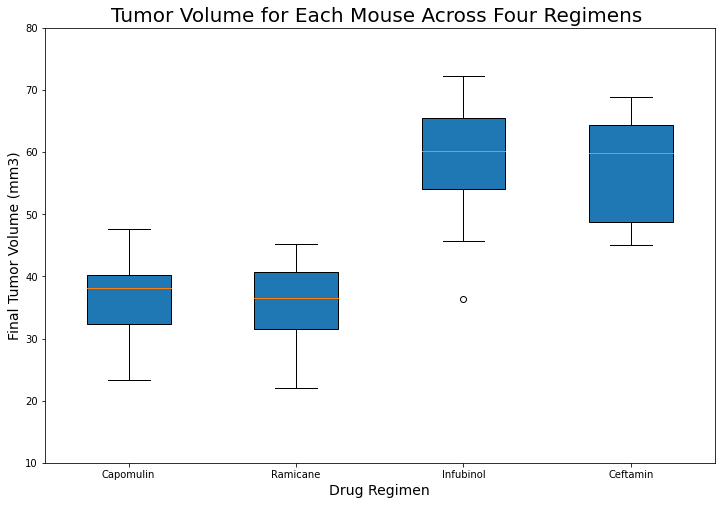

In [90]:
# Instructions: Box Plot
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)

# Tumor volume data based on top 4 regimes of interest
#
tumor_vol_final_4_plot = [capomulin_tumors, ramicane_tumors, infubinol_tumors, ceftamin_tumors]
regimes_list = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
treatment_list_vol = []
treatment_list_vol.append(tumor_vol_final_4_plot)

# Plotting of the final tumor volume of each mouse across four regimens of interest
#
fig1, ax1 = plt.subplots(figsize=(12, 8))

# loop through the list and do box plot for final tumor volume of each mouse 
# across four regimens of interest
#
for list in treatment_list_vol:
    ax1.boxplot(list, labels=regimes_list, widths = 0.5, patch_artist=True,vert=True)

ax1.set_title('Tumor Volume for Each Mouse Across Four Regimens ',fontsize =20)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 14)
ax1.set_xlabel('Drug Regimen',fontsize = 14)


plt.ylim(10, 80)

plt.savefig("../Images/box_plot_final_4.png", bbox_inches = "tight")

plt.show()

## Line and Scatter Plots

In [91]:
create_line_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "g316",:]
create_line_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
351,g316,Capomulin,Female,22,22,0,45.000000,0
352,g316,Capomulin,Female,22,22,5,44.022752,0
353,g316,Capomulin,Female,22,22,10,44.502042,0
354,g316,Capomulin,Female,22,22,15,45.216743,0
355,g316,Capomulin,Female,22,22,20,45.933322,1


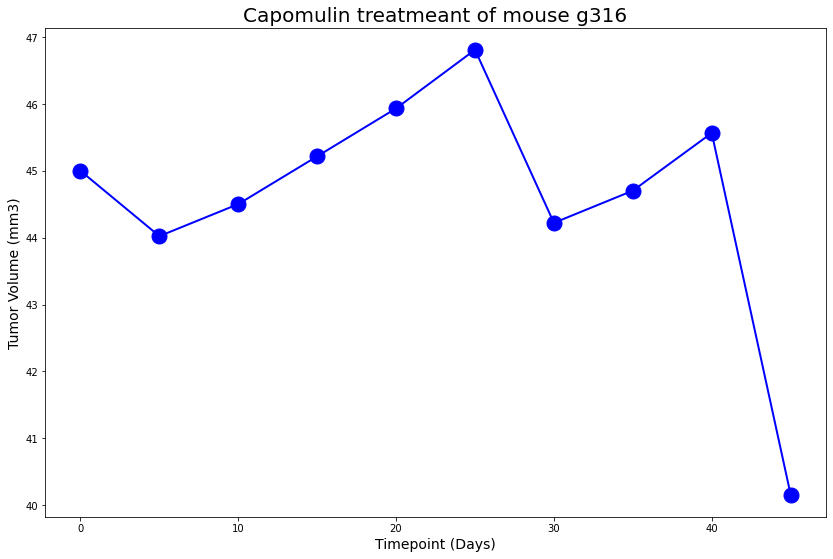

In [92]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
x_axis = create_line_df["Timepoint"]
tumor_vol = create_line_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(14, 9))
plt.title('Capomulin treatmeant of mouse g316',fontsize =20)
plt.plot(x_axis, tumor_vol,linewidth=2, markersize=15,marker="o",color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)',fontsize =14)
plt.ylabel('Tumor Volume (mm3)',fontsize =14)


plt.savefig("../Images/line_graph.png", bbox_inches = "tight")
plt.show()


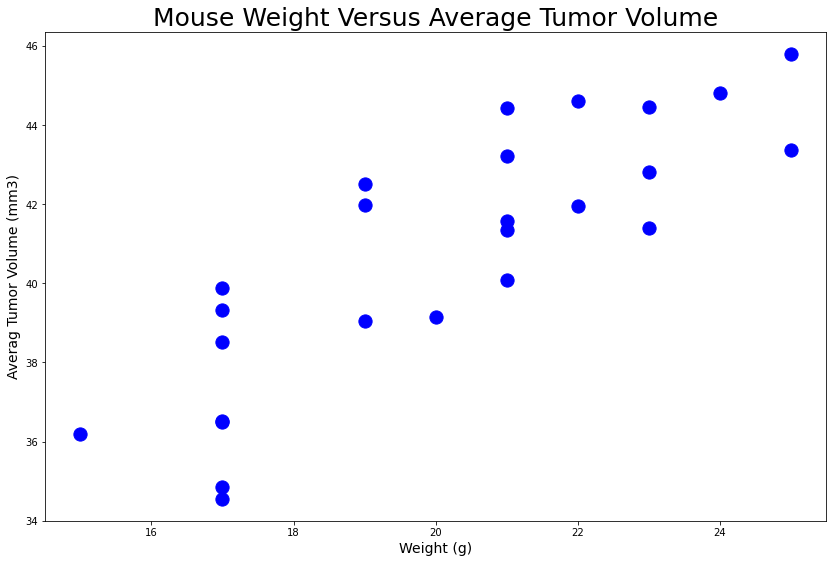

In [93]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
fig1, ax1 = plt.subplots(figsize=(14, 9))
average_capomulin_vol = capomulin_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(average_capomulin_vol['Weight (g)'],average_capomulin_vol['Tumor Volume (mm3)'],s=175, color="blue")
plt.title('Mouse Weight Versus Average Tumor Volume',fontsize =25)
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)',fontsize =14)


plt.savefig("../Images/scatterplot.png", bbox_inches = "tight")
plt.show()


## Correlation and Regression

In [94]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(average_capomulin_vol['Weight (g)'],average_capomulin_vol['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.84


In [95]:
x_values = average_capomulin_vol['Weight (g)']
y_values = average_capomulin_vol['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{corr}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)


slope:0.9544396890241045
intercept:21.552160532685015
rvalue (Correlation coefficient):0.8419363424694718
pandas (Correlation coefficient):0.84
stderr:0.1275435903320134
y = 0.95x + 21.55


The r-squared is: 0.7088568047708717


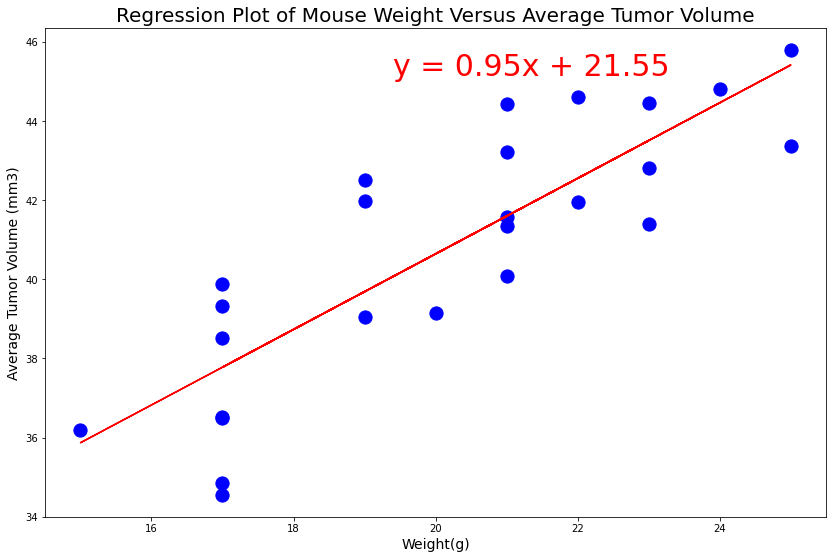

In [96]:
# Add the linear regression equation and line to plot
fig1, ax1 = plt.subplots(figsize=(14, 9))
plt.scatter(x_values,y_values,s=175, color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title('Regression Plot of Mouse Weight Versus Average Tumor Volume',fontsize =20)
plt.xlabel('Weight(g)',fontsize =14)
plt.ylabel('Average Tumor Volume (mm3)',fontsize =14)
ax1.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=30,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.savefig("../Images/linear_regression.png", bbox_inches = "tight")
plt.show()